In [7]:
import torch
import torchvision
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=True, download=True,
#                             transform=torchvision.transforms.Compose([
 #                              torchvision.transforms.ToTensor(),
    #                           torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

100.1%

Extracting ./files/MNIST/raw/train-images-idx3-ubyte.gz to ./files/MNIST/raw


113.5%

Extracting ./files/MNIST/raw/train-labels-idx1-ubyte.gz to ./files/MNIST/raw


180.4%

Extracting ./files/MNIST/raw/t10k-images-idx3-ubyte.gz to ./files/MNIST/raw
Extracting ./files/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./files/MNIST/raw
Processing...
Done!


In [14]:
examples = enumerate(test_loader)

In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [2]:
network = Net()
network.cuda()
optimizer = optim.Adam(network.parameters())

In [26]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [31]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'
                  .format(
                    epoch, 
                    batch_idx * len(data), 
                    len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
#            torch.save(network.state_dict(), '/results/model.pth')
#            torch.save(optimizer.state_dict(), '/results/optimizer.pth')

In [32]:
for epoch in range(1, n_epochs + 1):
    train(epoch)

/media/data/anaconda3/envs/mermaid/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.353016
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.285703
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.169955
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.023652
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.719450
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.290570
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.150212
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.827003
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.168238
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.867742
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.809387
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.787241
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.884502
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.655566
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.481239
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.582557
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.394001
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.602732
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.510116
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.403271
Train Epoch: 1 [12800/60000 (

Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.246997
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.152378
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.218244
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.107325
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.377591
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.413024
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.340023
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.340513
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.346408
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.182785
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.303584
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.206356
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.300380
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.252686
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.047714
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.332247
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.234174
Train Epoch: 2 [58240/60000 (97%)]	Loss: 0.292663
Train Epoch: 2 [58880/60000 (98%)]	Loss: 0.331838
Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.226378


In [5]:
next(network.parameters())

Parameter containing:
tensor([[[[ 1.7928e-01, -3.4437e-02,  1.0917e-01, -1.8672e-01,  4.3308e-02],
          [ 1.7641e-01, -6.5984e-02,  6.0735e-02,  1.4507e-01,  8.8400e-02],
          [-3.3043e-02,  1.7235e-01, -1.5583e-01, -2.1687e-02, -1.6773e-01],
          [-5.8570e-02,  1.4460e-02, -1.2049e-01, -1.4331e-01, -1.6970e-01],
          [-1.6223e-01,  1.2635e-01,  1.6997e-01,  7.7001e-02, -1.2798e-01]]],


        [[[-2.8225e-02,  6.3700e-02,  9.5483e-02,  1.1916e-01,  3.2231e-02],
          [ 1.8929e-01, -8.7515e-02, -1.3707e-01, -1.2514e-01,  1.3276e-01],
          [ 1.5024e-01,  3.0135e-02,  1.2184e-01, -7.5420e-02, -1.3225e-01],
          [ 3.3312e-02,  3.9317e-03,  1.0430e-01, -5.3450e-02, -1.6560e-01],
          [ 6.0334e-02, -1.4791e-01, -9.5879e-02, -1.8178e-02,  9.7077e-02]]],


        [[[ 1.0887e-01, -1.6129e-01,  1.7228e-01,  1.9830e-01, -1.3597e-01],
          [ 1.7421e-01, -1.0080e-01, -1.8725e-01, -1.5190e-01, -1.6906e-01],
          [-9.9204e-02, -2.1465e-02, -9.9745e-

0

In [8]:
list(train_loader)

[[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
            [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
            [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
            ...,
            [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
            [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
            [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
  
  
          [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
            [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
            [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
            ...,
            [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
            [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
            [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
  
  
          [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242

In [21]:
ds = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST("./files/",
        transform=torchvision.transforms.ToTensor()
    ),
    batch_size=500
)
import numpy as np
images = []
for _, batch in enumerate(ds):
    label = np.array(batch[1])
    batch_nines = label==9
    images.append(np.array(batch[0])[batch_nines])

In [38]:
len(images)

120

In [39]:
images_a = np.concatenate(images)

In [40]:
images_a.shape

(5949, 1, 28, 28)

In [41]:
import matplotlib.pyplot as plt

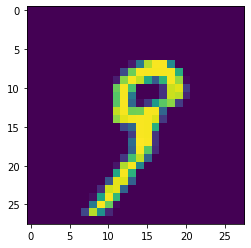

In [44]:
plt.imshow(images_a[1, 0])

In [47]:
images

[array([[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],
 
 
        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],
 
 
        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],
 
 
        ...,
 
 
        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
   